# Gather insights of amazon reviews

In [20]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
%matplotlib notebook

# Loading the data 
path = 'data/All_reviews.csv'
df = pd.read_csv(path, dtype={"kindle":object})
df.drop(df.columns[0],axis=1, inplace=True)

# Defining colors:
kindle_colors= ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#fcfc05']

## Exploration of data

In [21]:
df.head(5)

,id,ASIN,stars,username,title,text,date,offer type,color,verified purchase,comments,kindle unlimited,digital storage,connectivity,kindle
0,R61N3CY1FPX2W,B004HZYA6E,5,Tina,Kindle Keyboard 3G—best Kindle ever!,This older Kindle Keyboard 3G is so much bette...,2018-07-26,Without Special Offers $159,Graphite,Verified Purchase,0,Na,Na,Na,3
1,R2MTWINM4NF9VF,B004HZYA6E,1,Justin,Won't register,Wish I could give it a good rating. Device wou...,2017-02-19,Without Special Offers $159,Graphite,Verified Purchase,0,Na,Na,Na,3
2,R3U661U4J3S6SI,B004HZYA6E,4,Shabang,"Used, cheap, free 3G kindle that plays audio f...",I owned one when they first came out and bough...,2016-12-01,Without Special Offers $159,Graphite,Verified Purchase,0,Na,Na,Na,3
3,R4HJIQ9JJS51V,B004HZYA6E,5,eastcoast,Still love it in July of 2014,"I still love this---- even in July, 2014! I h...",2014-07-05,Without Special Offers $159,Graphite,Verified Purchase,0,Na,Na,Na,3
4,R1XZB69R0HWBD4,B004HZYA6E,5,Patricia,Best E-Reader Ever Made,This is BY FAR the best e-reader ever made. It...,2017-07-08,Without Special Offers $159,Graphite,Verified Purchase,0,Na,Na,Na,3


In [22]:
df.describe()

,stars,comments
count,169090.000000,169090.000000
mean,4.212928,0.232598
std,1.198218,1.186548
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,51.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169090 entries, 0 to 169089
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 169090 non-null  object
 1   ASIN               169090 non-null  object
 2   stars              169090 non-null  int64 
 3   username           169090 non-null  object
 4   title              169089 non-null  object
 5   text               169090 non-null  object
 6   date               169089 non-null  object
 7   offer type         169090 non-null  object
 8   color              156772 non-null  object
 9   verified purchase  169090 non-null  object
 10  comments           169090 non-null  int64 
 11  kindle unlimited   169090 non-null  object
 12  digital storage    169090 non-null  object
 13  connectivity       169090 non-null  object
 14  kindle             169090 non-null  object
dtypes: int64(2), object(13)
memory usage: 19.4+ MB


In [24]:
df.corr()

,stars,comments
stars,1.000000,-0.272035
comments,-0.272035,1.000000


<IPython.core.display.Javascript object>


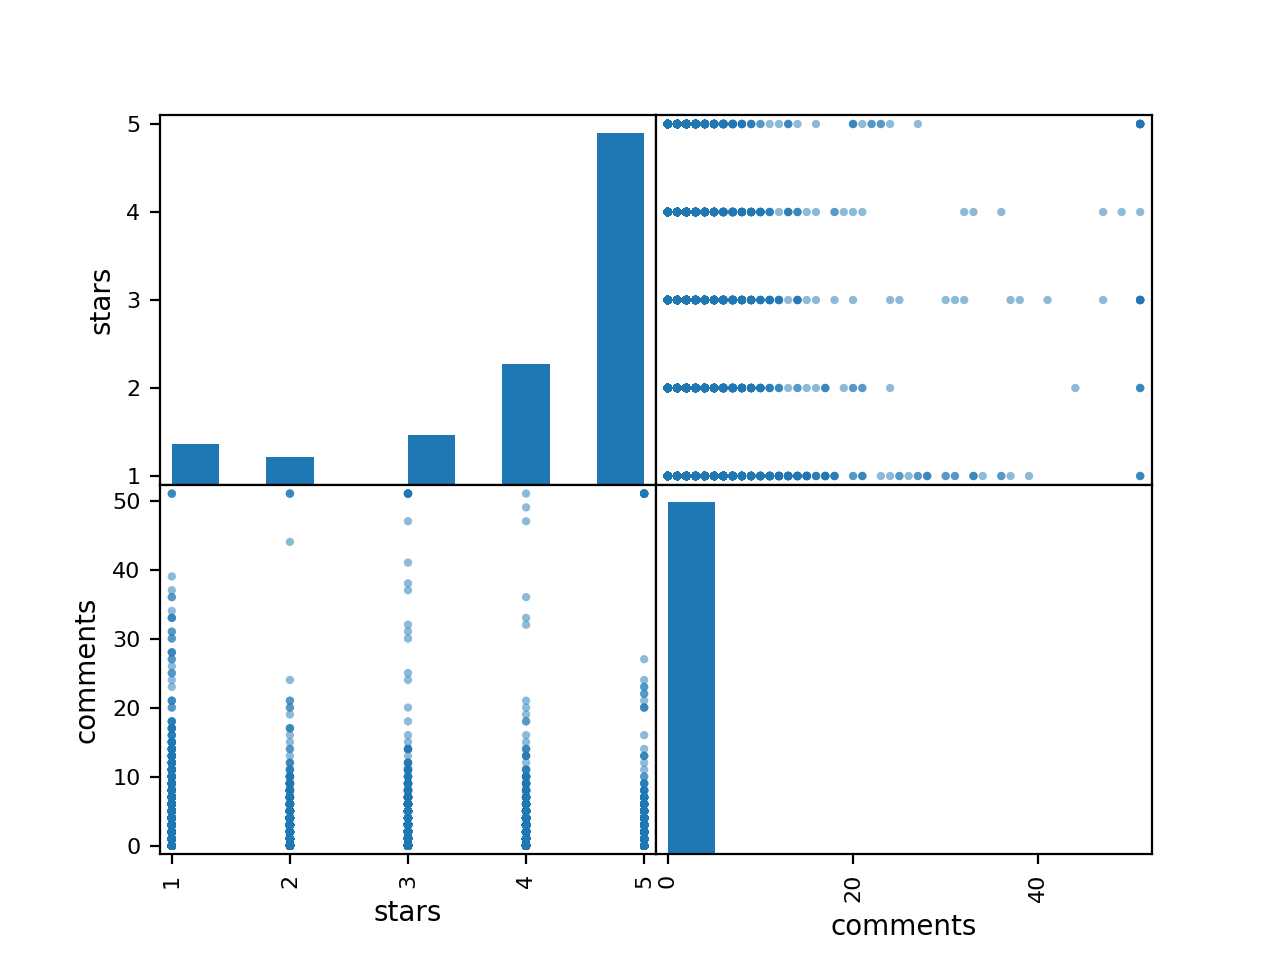

In [25]:
pd.plotting.scatter_matrix(df);

### Draw histogram of all data

In [31]:
#aggregate data
a = df.groupby(["kindle","id","date"], sort=False).count()
#extract one column
data = pd.DataFrame(a["ASIN"])

In [34]:
#Iterate through the kindles and apply the same operations
# extract the data for each kindle to be able to colorcode them
k3 = data.xs(key="3", level="kindle")
k4 = data.xs(key="4", level="kindle")
k5 = data.xs(key="5", level="kindle")
pw5 = data.xs(key="paperwhite 5", level="kindle")
pw6 = data.xs(key="paperwhite 6", level="kindle")
pw7 = data.xs(key="paperwhite 7", level="kindle")
k7 = data.xs(key="7", level="kindle")
v7 = data.xs(key="voyage 7", level="kindle")
k8 = data.xs(key="8", level="kindle")
o9 = data.xs(key="oasis 9", level="kindle")
pw10 = data.xs(key="paperwhite 10", level="kindle")
i=0
kindles = [k3, k4,k5, pw5, pw6, k7, v7, pw7, k8, o9, pw10]


for product in kindles: 
    #Convert the data into the correct format for matplotlib
    product.reset_index(inplace=True)
    product.drop(product.columns[0],axis=1, inplace=True)
    product.set_index('date', inplace=True)
    product.index = pd.to_datetime(product.index)
    product = mpl.dates.date2num(product.index.to_pydatetime()).copy()
    kindles[i] = product
    i+=1

<IPython.core.display.Javascript object>


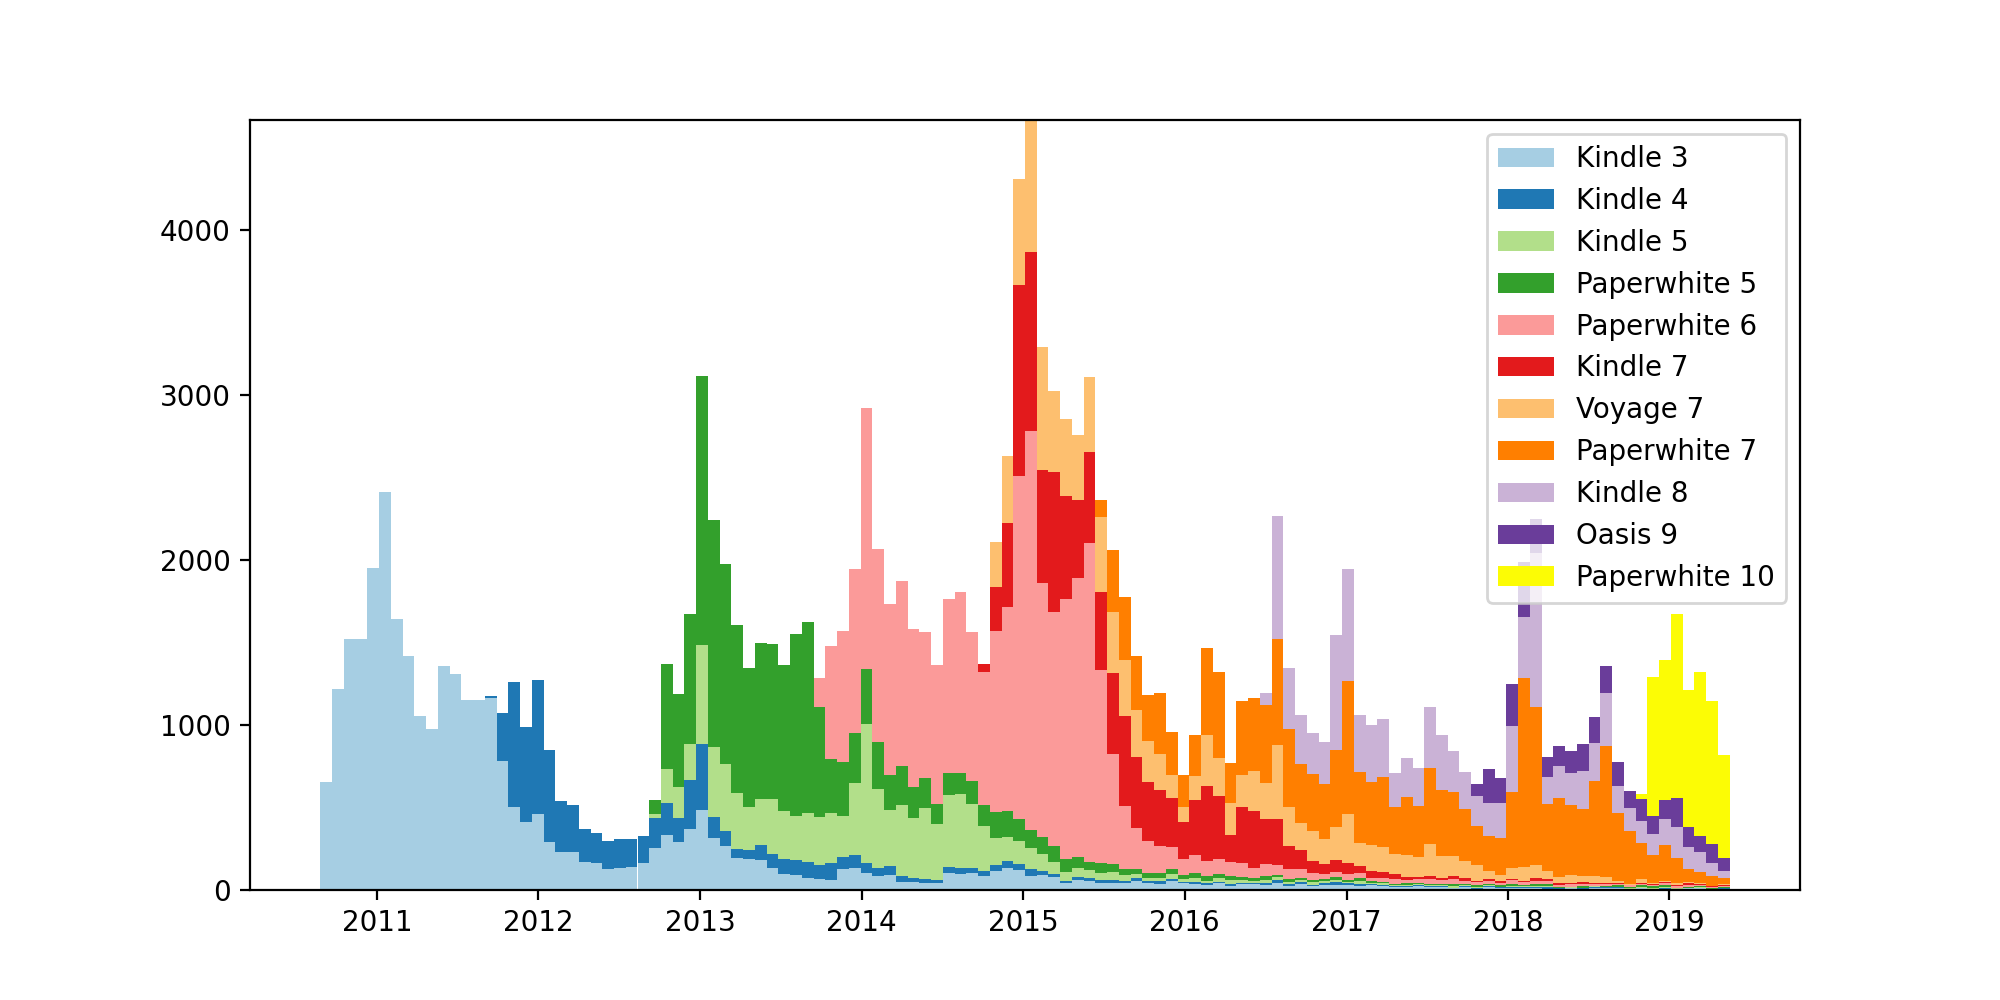

In [35]:
legend = ["Kindle 3", "Kindle 4", "Kindle 5", "Paperwhite 5",
               "Paperwhite 6", "Kindle 7", "Voyage 7", "Paperwhite 7", "Kindle 8", "Oasis 9", "Paperwhite 10"]
fig = plt.figure(figsize=(10,5))
s = fig.add_subplot(111)
#Data needs to be an array to work
s.hist(kindles,bins=120,stacked=True, color=kindle_colors, alpha=1)
s.xaxis.set_major_locator(mdates.YearLocator())
s.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
s.legend(legend);